In [53]:
import numpy as np     # Library to handle data in a vectorized manner
import pandas as pd    # Library for data analsysis
import matplotlib.pyplot as plt    # Library for visualization tools
import matplotlib.cm as cm

In [3]:
df_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')[0]  # Get the data for the different boroughs of Toronto
df_wiki

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,Malvern / Rouge


In [5]:
#Data wrangling
df_wiki.drop(df_wiki.loc[df_wiki['Borough']=='Not assigned'].index, inplace=True)  # Drop unassigned Borough values
#Modify Neighborhood values
for n in df_wiki['Neighborhood']:
    if(n == 'NaN'):
        df_wiki.replace(to_replace ='NaN',  value = Borough.value) 

df_wiki['Neighborhood'] = [n.replace('/', ',') for n in df_wiki['Neighborhood']]
df_wiki = df_wiki.reset_index(drop=True)          # Reset the index
df_wiki

,Postal code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern , Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill , Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [6]:
df_wiki.shape     # Get the shape of the dataframe

(103, 3)

In [7]:
df_pc = pd.read_csv('https://cocl.us/Geospatial_data')   # Get the latitude and longitude of different areas via their postal codes
df_pc

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [8]:
df_wiki = df_wiki.rename(columns = {'Postal code':'Postal Code'})
print(df_wiki.head())

  Postal Code           Borough                                  Neighborhood
0         M3A        North York                                     Parkwoods
1         M4A        North York                              Victoria Village
2         M5A  Downtown Toronto                    Regent Park , Harbourfront
3         M6A        North York             Lawrence Manor , Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park , Ontario Provincial Government


In [9]:
df = pd.merge(df_wiki, df_pc, on = 'Postal Code')      # Update the latitude and longitude of each place
df

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [12]:
!conda install -c conda-forge folium=0.5.0 --yes 
import folium    # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

# Segregate the data into different dataframes

In [14]:
east_york = df.loc[df['Borough'] == "East York"]    # Dataframe for East York
east_york = east_york.reset_index(drop=True)
east_york

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
1,M4C,East York,Woodbine Heights,43.695344,-79.318389
2,M4G,East York,Leaside,43.709060,-79.363452
3,M4H,East York,Thorncliffe Park,43.705369,-79.349372
4,M4J,East York,East Toronto,43.685347,-79.338106


In [15]:
etobicoke = df.loc[df['Borough'] == "Etobicoke"]      # Dataframe for Etobicoke 
etobicoke = etobicoke.reset_index(drop=True)
etobicoke

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
1,M9B,Etobicoke,"West Deane Park , Princess Gardens , Martin Gr...",43.650943,-79.554724
2,M9C,Etobicoke,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201
3,M9P,Etobicoke,Westmount,43.696319,-79.532242
4,M9R,Etobicoke,"Kingsview Village , St. Phillips , Martin Grov...",43.688905,-79.554724
5,M8V,Etobicoke,"New Toronto , Mimico South , Humber Bay Shores",43.605647,-79.501321
6,M9V,Etobicoke,"South Steeles , Silverstone , Humbergate , Jam...",43.739416,-79.588437
7,M8W,Etobicoke,"Alderwood , Long Branch",43.602414,-79.543484
8,M9W,Etobicoke,Northwest,43.706748,-79.594054
9,M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.653654,-79.506944


In [109]:
north_york = df.loc[df['Borough'] == "North York"]     # Dataframe for North York
north_york = north_york.reset_index(drop=True)
north_york

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
3,M3B,North York,Don Mills,43.745906,-79.352188
4,M6B,North York,Glencairn,43.709577,-79.445073
5,M3C,North York,Don Mills,43.725900,-79.340923
6,M2H,North York,Hillcrest Village,43.803762,-79.363452
7,M3H,North York,"Bathurst Manor , Wilson Heights , Downsview North",43.754328,-79.442259
8,M2J,North York,"Fairview , Henry Farm , Oriole",43.778517,-79.346556
9,M3J,North York,"Northwood Park , York University",43.767980,-79.487262


In [17]:
scarborough = df.loc[df['Borough'] == "Scarborough"]        # Dataframe for Scarborough
scarborough = scarborough.reset_index(drop=True)
scarborough

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood , Morningside , West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park , Ionview , East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile , Clairlea , Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside , Cliffcrest , Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff , Cliffside West",43.692657,-79.264848


In [18]:
york = df.loc[df['Borough'] == "York"]          # Dataframe for York
york = york.reset_index(drop=True)
york

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M6C,York,Humewood-Cedarvale,43.693781,-79.428191
1,M6E,York,Caledonia-Fairbanks,43.689026,-79.453512
2,M6M,York,"Del Ray , Mount Dennis , Keelsdale and Silvert...",43.691116,-79.476013
3,M6N,York,"Runnymede , The Junction North",43.673185,-79.487262
4,M9N,York,Weston,43.706876,-79.518188


In [19]:
!pip install wordcloud            # Install for generating word clouds
from wordcloud import WordCloud, STOPWORDS

     |████████████████████████████████| 368kB 7.3MB/s eta 0:00:01


In [20]:
from geopy.geocoders import Nominatim
import requests
import json        # Library to handle JSON files

In [21]:
# The code was removed by Watson Studio for sharing.

## Get the coordinates of East York and map them

In [22]:
address = 'East York, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
es_latitude = location.latitude
es_longitude = location.longitude
print('The geographical coordinate of East York are {}, {}.'.format(es_latitude, es_longitude))

The geographical coordinate of East York are 43.699971000000005, -79.33251996261595.


In [23]:
# create map of East York using latitude and longitude values
map_es = folium.Map(location=[es_latitude, es_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(east_york['Latitude'], east_york['Longitude'], east_york['Borough'], east_york['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_es)  
    
map_es

## Get the coordinates of Etobicoke and map them

In [24]:
address = 'Etobicoke, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
et_latitude = location.latitude
et_longitude = location.longitude
print('The geographical coordinates of Etobicoke are {}, {}.'.format(et_latitude, et_longitude))

The geographical coordinates of Etobicoke are 43.671459150000004, -79.55249206611668.


In [25]:
# create map of Etobicoke using latitude and longitude values
map_et = folium.Map(location=[et_latitude, et_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(etobicoke['Latitude'], etobicoke['Longitude'], etobicoke['Borough'], etobicoke['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_et)  
    
map_et

## Get the coordinates of North York and map them

In [26]:
address = 'North York, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
nt_latitude = location.latitude
nt_longitude = location.longitude
print('The geographical coordinates of North York are {}, {}.'.format(nt_latitude, nt_longitude))

The geographical coordinates of North York are 43.7543263, -79.44911696639593.


In [27]:
# create map of North York using latitude and longitude values
map_nt = folium.Map(location=[nt_latitude, nt_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(north_york['Latitude'], north_york['Longitude'], north_york['Borough'], north_york['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nt)  

map_nt

## Get the coordinates of Scarborough and map them

In [28]:
address = 'Scarborough, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
sc_latitude = location.latitude
sc_longitude = location.longitude
print('The geographical coordinates of Scarborough are {}, {}.'.format(sc_latitude, sc_longitude))

The geographical coordinates of Scarborough are 43.773077, -79.257774.


In [29]:
# create map of Scarborough using latitude and longitude values
map_sc = folium.Map(location=[sc_latitude, sc_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(scarborough['Latitude'], scarborough['Longitude'], scarborough['Borough'], scarborough['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sc)  
    
map_sc

## Get the coordinates of York and map them

In [30]:
address = 'York, Toronto'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
yk_latitude = location.latitude
yk_longitude = location.longitude
print('The geographical coordinates of York are {}, {}.'.format(yk_latitude, yk_longitude))

The geographical coordinates of York are 43.67910515, -79.49118414007154.


In [31]:
# create map of Toronto using latitude and longitude values
map_yk = folium.Map(location=[yk_latitude, yk_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(york['Latitude'], york['Longitude'], york['Borough'], york['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_yk)  
    
map_yk

# Use of Foursquare API

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Get the nearby venues for each borough

### Scarborough

In [33]:
#Passing values to the above function
sc_venues = getNearbyVenues(names=scarborough['Neighborhood'],
                                   latitudes=scarborough['Latitude'],
                                   longitudes=scarborough['Longitude']
                                  )

Malvern , Rouge
Rouge Hill , Port Union , Highland Creek
Guildwood , Morningside , West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park , Ionview , East Birchmount Park
Golden Mile , Clairlea , Oakridge
Cliffside , Cliffcrest , Scarborough Village West
Birch Cliff , Cliffside West
Dorset Park , Wexford Heights , Scarborough Town Centre
Wexford , Maryvale
Agincourt
Clarks Corners , Tam O'Shanter , Sullivan
Milliken , Agincourt North , Steeles East , L'Amoreaux East
Steeles West , L'Amoreaux West
Upper Rouge


In [34]:
sc_venues         # Display the venues around Scarborough

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern , Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill , Port Union , Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Guildwood , Morningside , West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
3,"Guildwood , Morningside , West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store
4,"Guildwood , Morningside , West Hill",43.763573,-79.188711,Big Bite Burrito,43.766299,-79.190720,Mexican Restaurant
5,"Guildwood , Morningside , West Hill",43.763573,-79.188711,Enterprise Rent-A-Car,43.764076,-79.193406,Rental Car Location
6,"Guildwood , Morningside , West Hill",43.763573,-79.188711,Woburn Medical Centre,43.766631,-79.192286,Medical Center
7,"Guildwood , Morningside , West Hill",43.763573,-79.188711,Lawrence Ave E & Kingston Rd,43.767704,-79.189490,Intersection
8,"Guildwood , Morningside , West Hill",43.763573,-79.188711,Eggsmart,43.767800,-79.190466,Breakfast Spot
9,Woburn,43.770992,-79.216917,Starbucks,43.770037,-79.221156,Coffee Shop


### Wordcloud for Venue Category

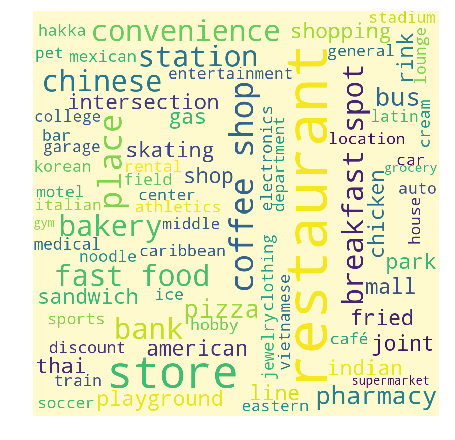

In [54]:
stopwords = set(STOPWORDS)
comment_words = '' 
# iterate through the csv file 
for val in sc_venues['Venue Category']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='lemonchiffon', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [36]:
print('There are {} uniques categories in Scarborough.'.format(len(sc_venues['Venue Category'].unique())))

There are 54 uniques categories in Scarborough.


### North York

In [37]:
nt_venues = getNearbyVenues(names=north_york['Neighborhood'],
                                   latitudes=north_york['Latitude'],
                                   longitudes=north_york['Longitude']
                                  )

Parkwoods
Victoria Village
Lawrence Manor , Lawrence Heights
Don Mills
Glencairn
Don Mills
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Fairview , Henry Farm , Oriole
Northwood Park , York University
Bayview Village
Downsview
York Mills , Silver Hills
Downsview
North Park , Maple Leaf Park , Upwood Park
Humber Summit
Willowdale , Newtonbrook
Downsview
Bedford Park , Lawrence Manor East
Humberlea , Emery
Willowdale
Downsview
York Mills West
Willowdale


In [38]:
nt_venues      #Display the venues around North York

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
5,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
6,Victoria Village,43.725882,-79.315572,The Frig,43.727051,-79.317418,French Restaurant
7,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
8,Victoria Village,43.725882,-79.315572,Pizza Nova,43.725824,-79.312860,Pizza Place
9,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,Roots,43.718214,-79.463893,Boutique


### Wordcloud for Venue Category

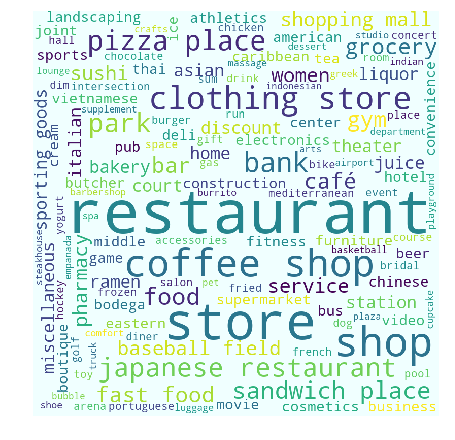

In [55]:
stopwords = set(STOPWORDS)
comment_words = '' 
# iterate through the csv file 
for val in nt_venues['Venue Category']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='azure', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [40]:
print('There are {} uniques categories in North York.'.format(len(nt_venues['Venue Category'].unique())))

There are 106 uniques categories in North York.


### East York

In [41]:
es_venues = getNearbyVenues(names=east_york['Neighborhood'],
                                   latitudes=east_york['Latitude'],
                                   longitudes=east_york['Longitude']
                                  )

Parkview Hill , Woodbine Gardens
Woodbine Heights
Leaside
Thorncliffe Park
East Toronto


In [42]:
es_venues      # Display the venues around East York

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,Jawny Bakers,43.705783,-79.312913,Gastropub
1,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
2,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,Shoppers Drug Mart,43.705933,-79.312825,Pharmacy
3,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,TD Canada Trust,43.705740,-79.312270,Bank
4,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,Pizza Pizza,43.705159,-79.313130,Pizza Place
5,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,East York Animal Clinic,43.705921,-79.312196,Pet Store
6,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,St. Clair Ave E & O'Connor Dr,43.705233,-79.313274,Intersection
7,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,Venice Pizza,43.705921,-79.313957,Pizza Place
8,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,Harvey's,43.708136,-79.314105,Fast Food Restaurant
9,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937,TKTO - Toronto Knife Throwing Organization,43.709966,-79.313411,Athletics & Sports


### Wordcloud for Venue Category

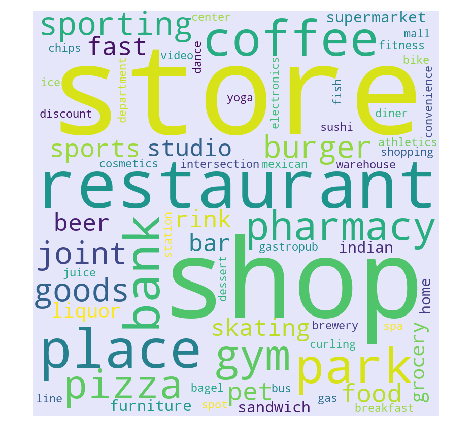

In [56]:
stopwords = set(STOPWORDS)
comment_words = '' 

# iterate through the csv file 
for val in es_venues['Venue Category']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='lavender',
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [44]:
print('There are {} uniques categories in East York.'.format(len(es_venues['Venue Category'].unique())))

There are 48 uniques categories in East York.


### Etobicoke

In [45]:
et_venues = getNearbyVenues(names=etobicoke['Neighborhood'],
                                   latitudes=etobicoke['Latitude'],
                                   longitudes=etobicoke['Longitude']
                                  )

Islington Avenue
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Westmount
Kingsview Village , St. Phillips , Martin Grove Gardens , Richview Gardens
New Toronto , Mimico South , Humber Bay Shores
South Steeles , Silverstone , Humbergate , Jamestown , Mount Olive , Beaumond Heights , Thistletown , Albion Gardens
Alderwood , Long Branch
Northwest
The Kingsway , Montgomery Road , Old Mill North
Old Mill South , King's Mill Park , Sunnylea , Humber Bay , Mimico NE , The Queensway East , Royal York South East , Kingsway Park South East
Mimico NW , The Queensway West , South of Bloor , Kingsway Park South West , Royal York South West


In [46]:
et_venues           # Display the venues around Etobicoke

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"West Deane Park , Princess Gardens , Martin Gr...",43.650943,-79.554724,Canadian Appliance Source Etobicoke,43.649864,-79.558461,Home Service
1,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,LCBO,43.642099,-79.576592,Liquor Store
2,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Starbucks,43.641312,-79.576924,Coffee Shop
3,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,The Beer Store,43.641313,-79.576925,Beer Store
4,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Shoppers Drug Mart,43.641312,-79.576924,Cosmetics Shop
5,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Pizza Hut,43.641845,-79.576556,Pizza Place
6,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Cafe Sympatico,43.641820,-79.576721,Café
7,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Hasty Market,43.641871,-79.576370,Convenience Store
8,"Eringate , Bloordale Gardens , Old Burnhamthor...",43.643515,-79.577201,Burnhamthorpe Mall,43.641741,-79.576891,Shopping Plaza
9,Westmount,43.696319,-79.532242,Mayflower Chinese Food,43.692753,-79.531566,Chinese Restaurant


### Wordcloud for Venue Category

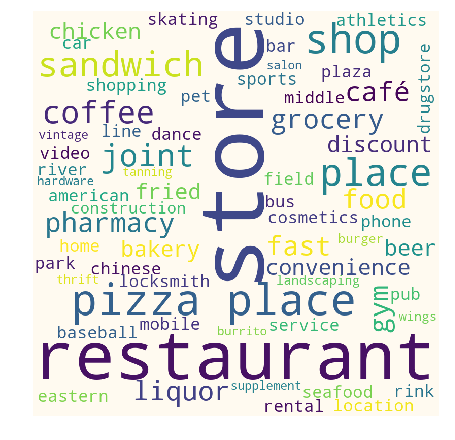

In [57]:
stopwords = set(STOPWORDS)
comment_words = '' 
# iterate through the csv file 
for val in et_venues['Venue Category']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='floralwhite', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [48]:
print('There are {} uniques categories in Etobicoke.'.format(len(et_venues['Venue Category'].unique())))

There are 45 uniques categories in Etobicoke.


### York

In [49]:
yk_venues = getNearbyVenues(names=york['Neighborhood'],
                                   latitudes=york['Latitude'],
                                   longitudes=york['Longitude']
                                  )

Humewood-Cedarvale
Caledonia-Fairbanks
Del Ray , Mount Dennis , Keelsdale and Silverthorn
Runnymede , The Junction North
Weston


In [50]:
yk_venues                     # Display the venues around York

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Park,43.692535,-79.428705,Field
1,Humewood-Cedarvale,43.693781,-79.428191,Cedarvale Ravine,43.690188,-79.426106,Trail
2,Humewood-Cedarvale,43.693781,-79.428191,Phil White Arena,43.691303,-79.431761,Hockey Arena
3,Caledonia-Fairbanks,43.689026,-79.453512,Nairn Park,43.690654,-79.456300,Park
4,Caledonia-Fairbanks,43.689026,-79.453512,Maximum Woman,43.690651,-79.456333,Women's Store
5,Caledonia-Fairbanks,43.689026,-79.453512,Fairbanks Pool,43.691959,-79.448922,Pool
6,Caledonia-Fairbanks,43.689026,-79.453512,Fairbank Memorial Park,43.692028,-79.448924,Park
7,"Del Ray , Mount Dennis , Keelsdale and Silvert...",43.691116,-79.476013,Subway,43.690218,-79.474050,Sandwich Place
8,"Del Ray , Mount Dennis , Keelsdale and Silvert...",43.691116,-79.476013,2 Brothers shawarma,43.690118,-79.475150,Turkish Restaurant
9,"Del Ray , Mount Dennis , Keelsdale and Silvert...",43.691116,-79.476013,Timothy's World Coffee,43.690072,-79.474599,Coffee Shop


### Wordcloud for Venue Category

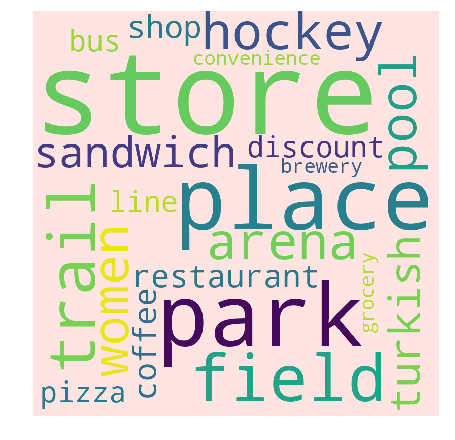

In [58]:
stopwords = set(STOPWORDS)
comment_words = '' 
# iterate through the csv file 
for val in yk_venues['Venue Category']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='mistyrose', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (6,6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [52]:
print('There are {} uniques categories in York.'.format(len(yk_venues['Venue Category'].unique())))

There are 15 uniques categories in York.


## Visualize the popularity of the venues in a given borough

### Bar graph for Scarborough

<BarContainer object of 54 artists>

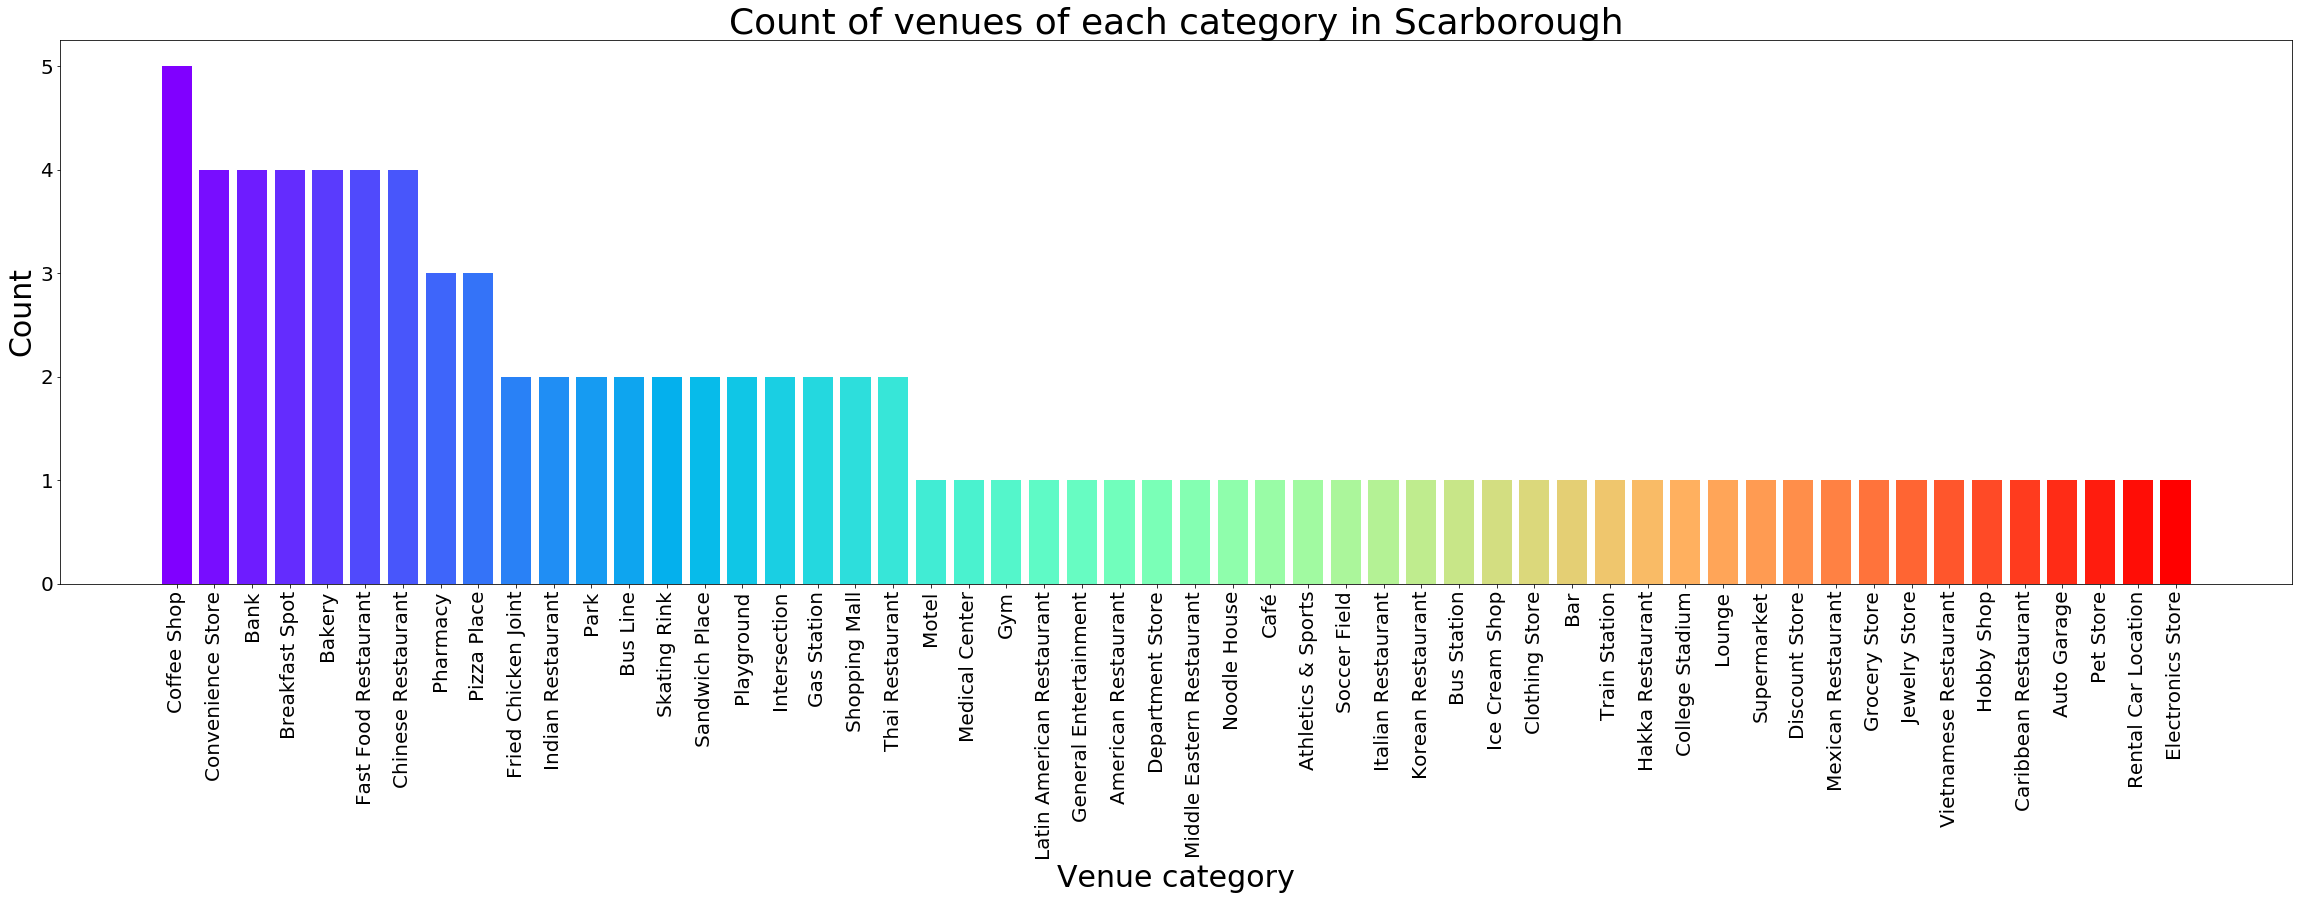

In [59]:
venue_distribution = sc_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 10))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Venue category", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.title("Count of venues of each category in Scarborough", fontsize = 36)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

**Coffee Shop is the most common venue in Scarborough.**

### Bar graph for North York

<BarContainer object of 106 artists>

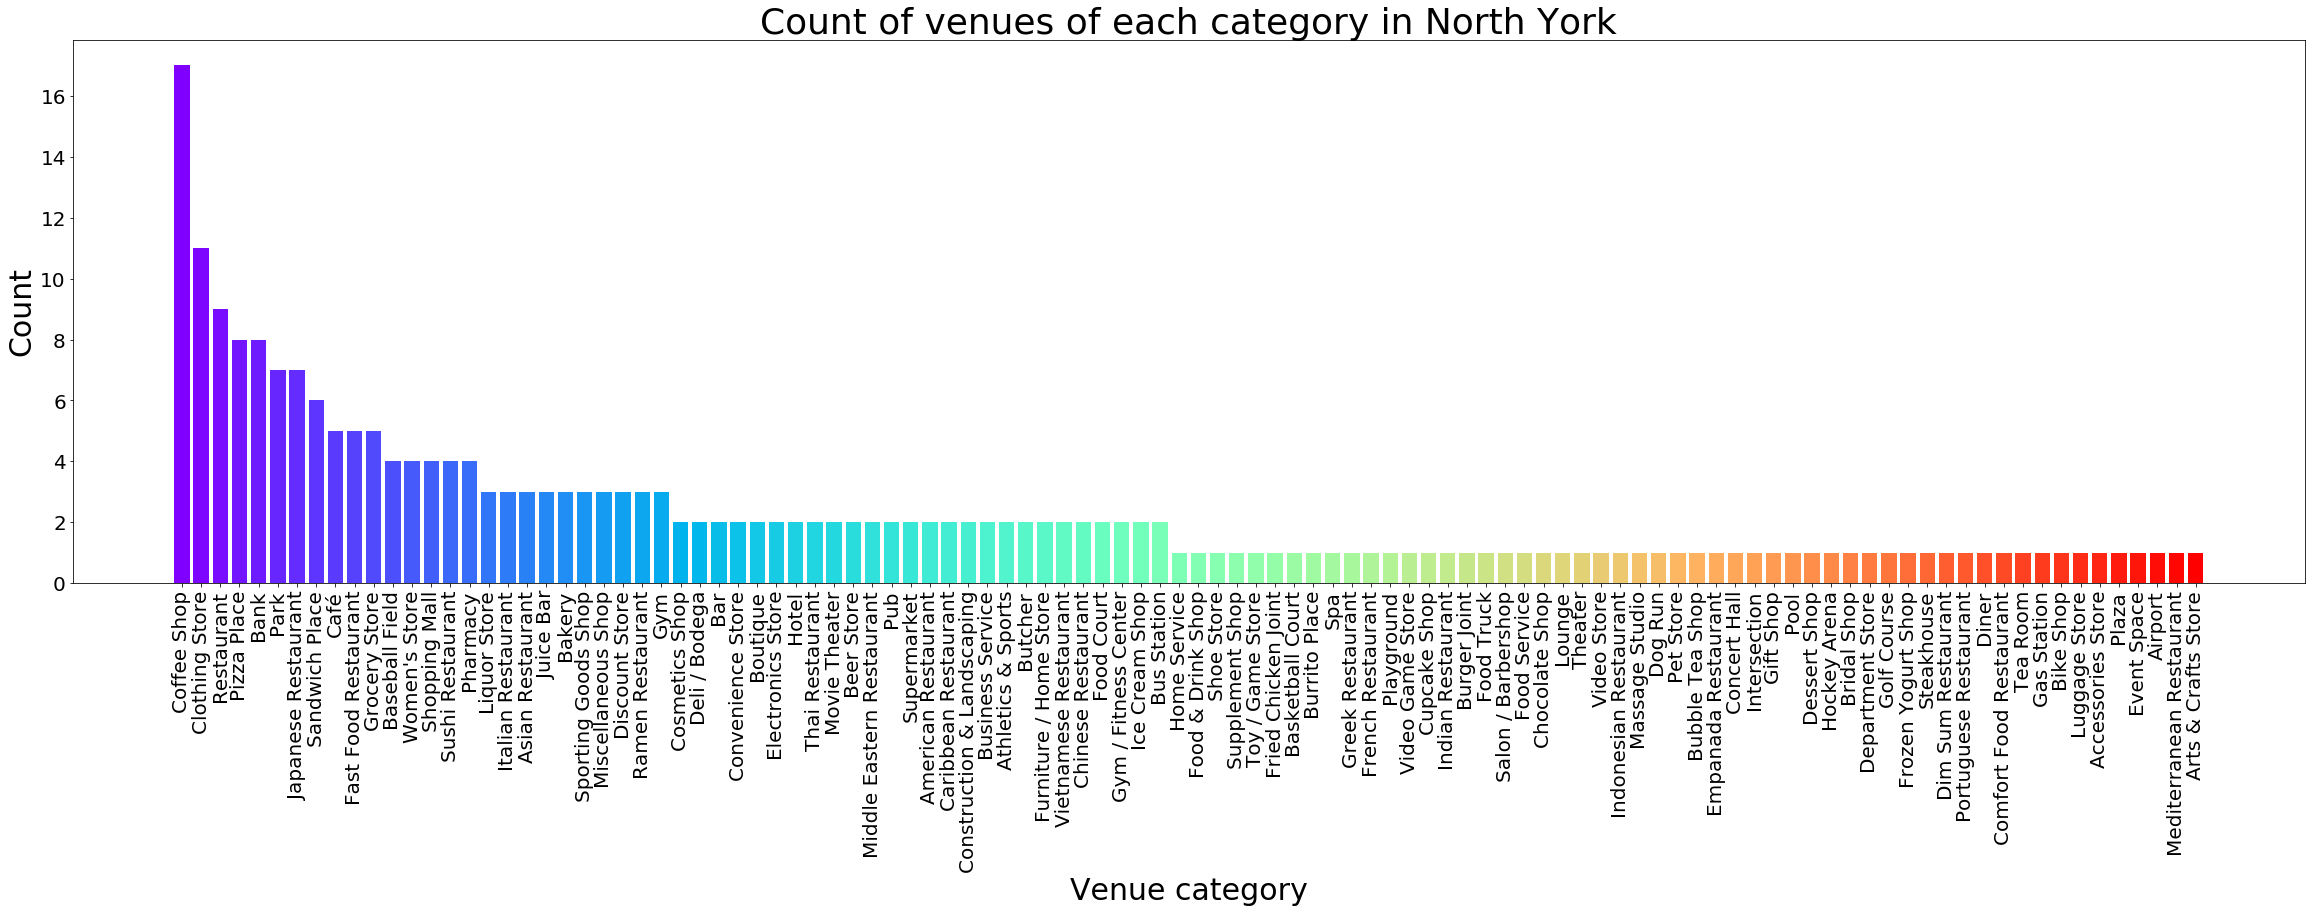

In [60]:
venue_distribution = nt_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 10))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Venue category", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.title("Count of venues of each category in North York", fontsize = 36)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

**Coffee Shop is the most common venue in North York.**

### Bar graph for East York

<BarContainer object of 48 artists>

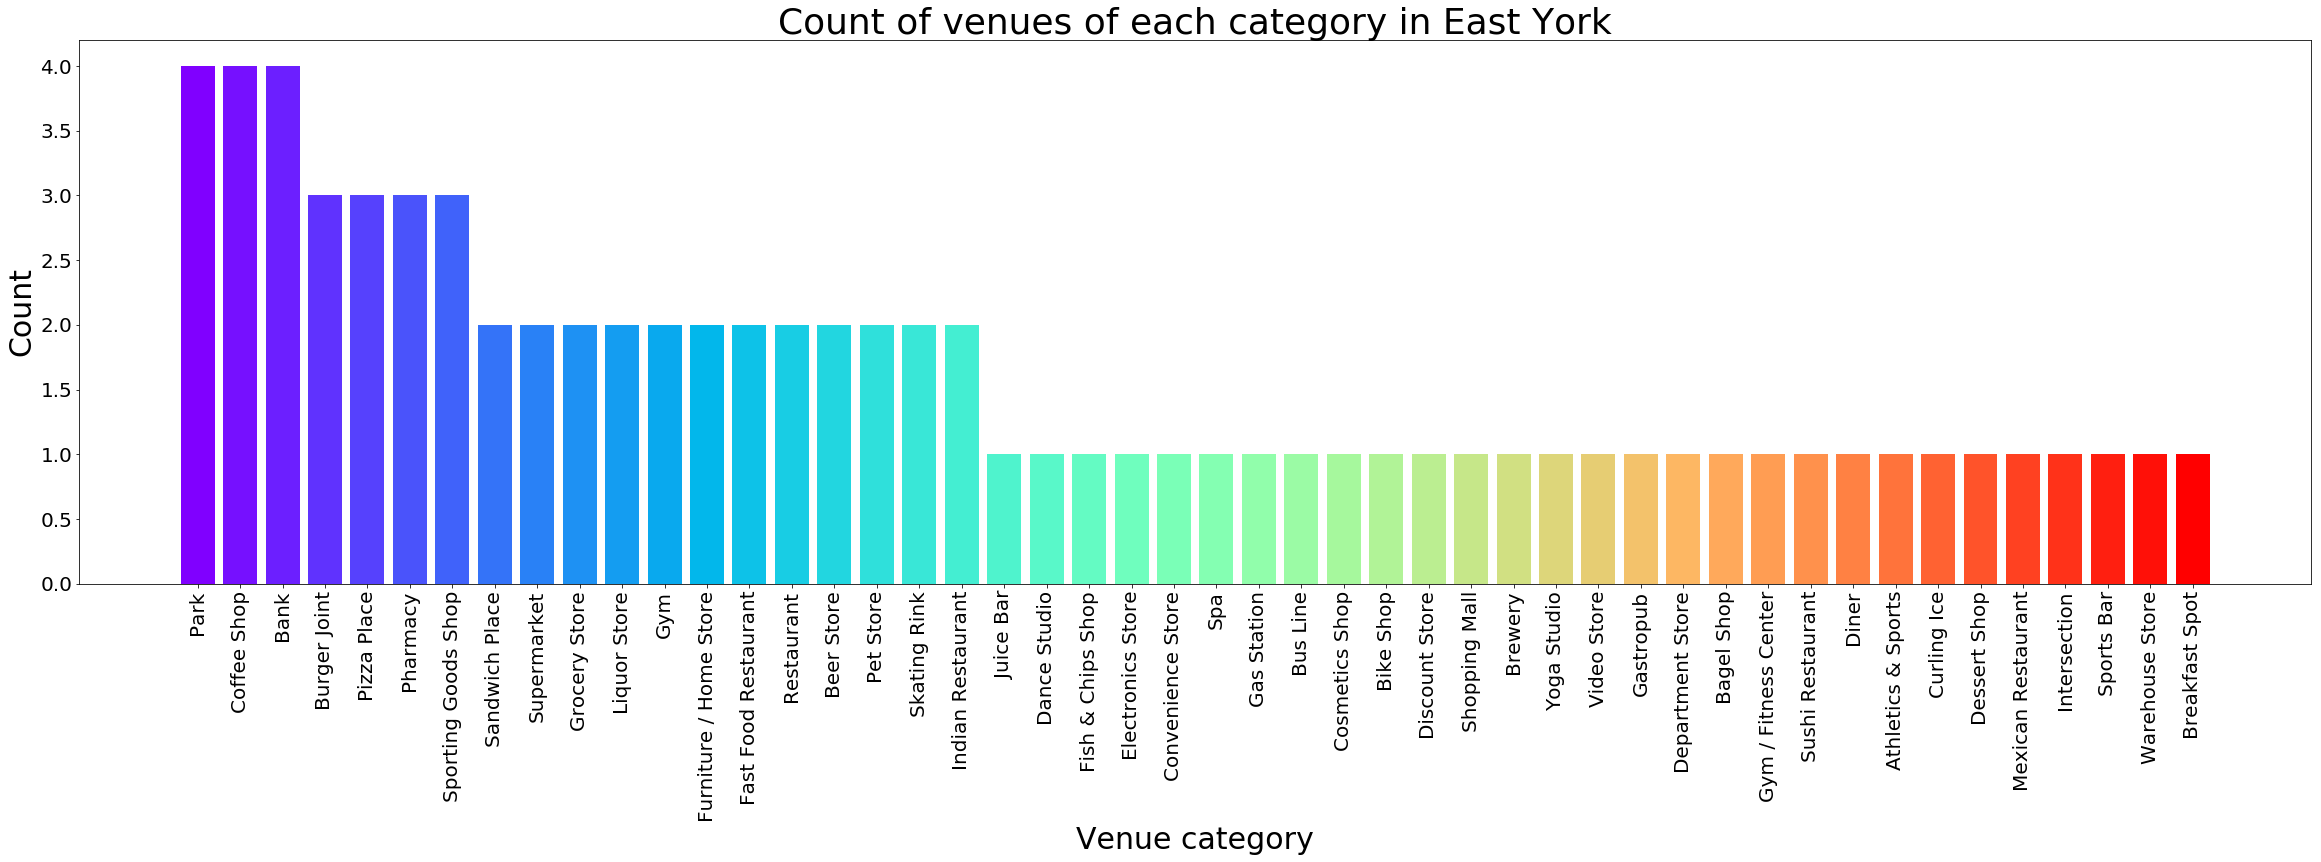

In [61]:
venue_distribution = es_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 10))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Venue category", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.title("Count of venues of each category in East York", fontsize = 36)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

**Coffee shop, bank and park form the most common venues in East York.**

### Bar graph for Etobicoke

<BarContainer object of 45 artists>

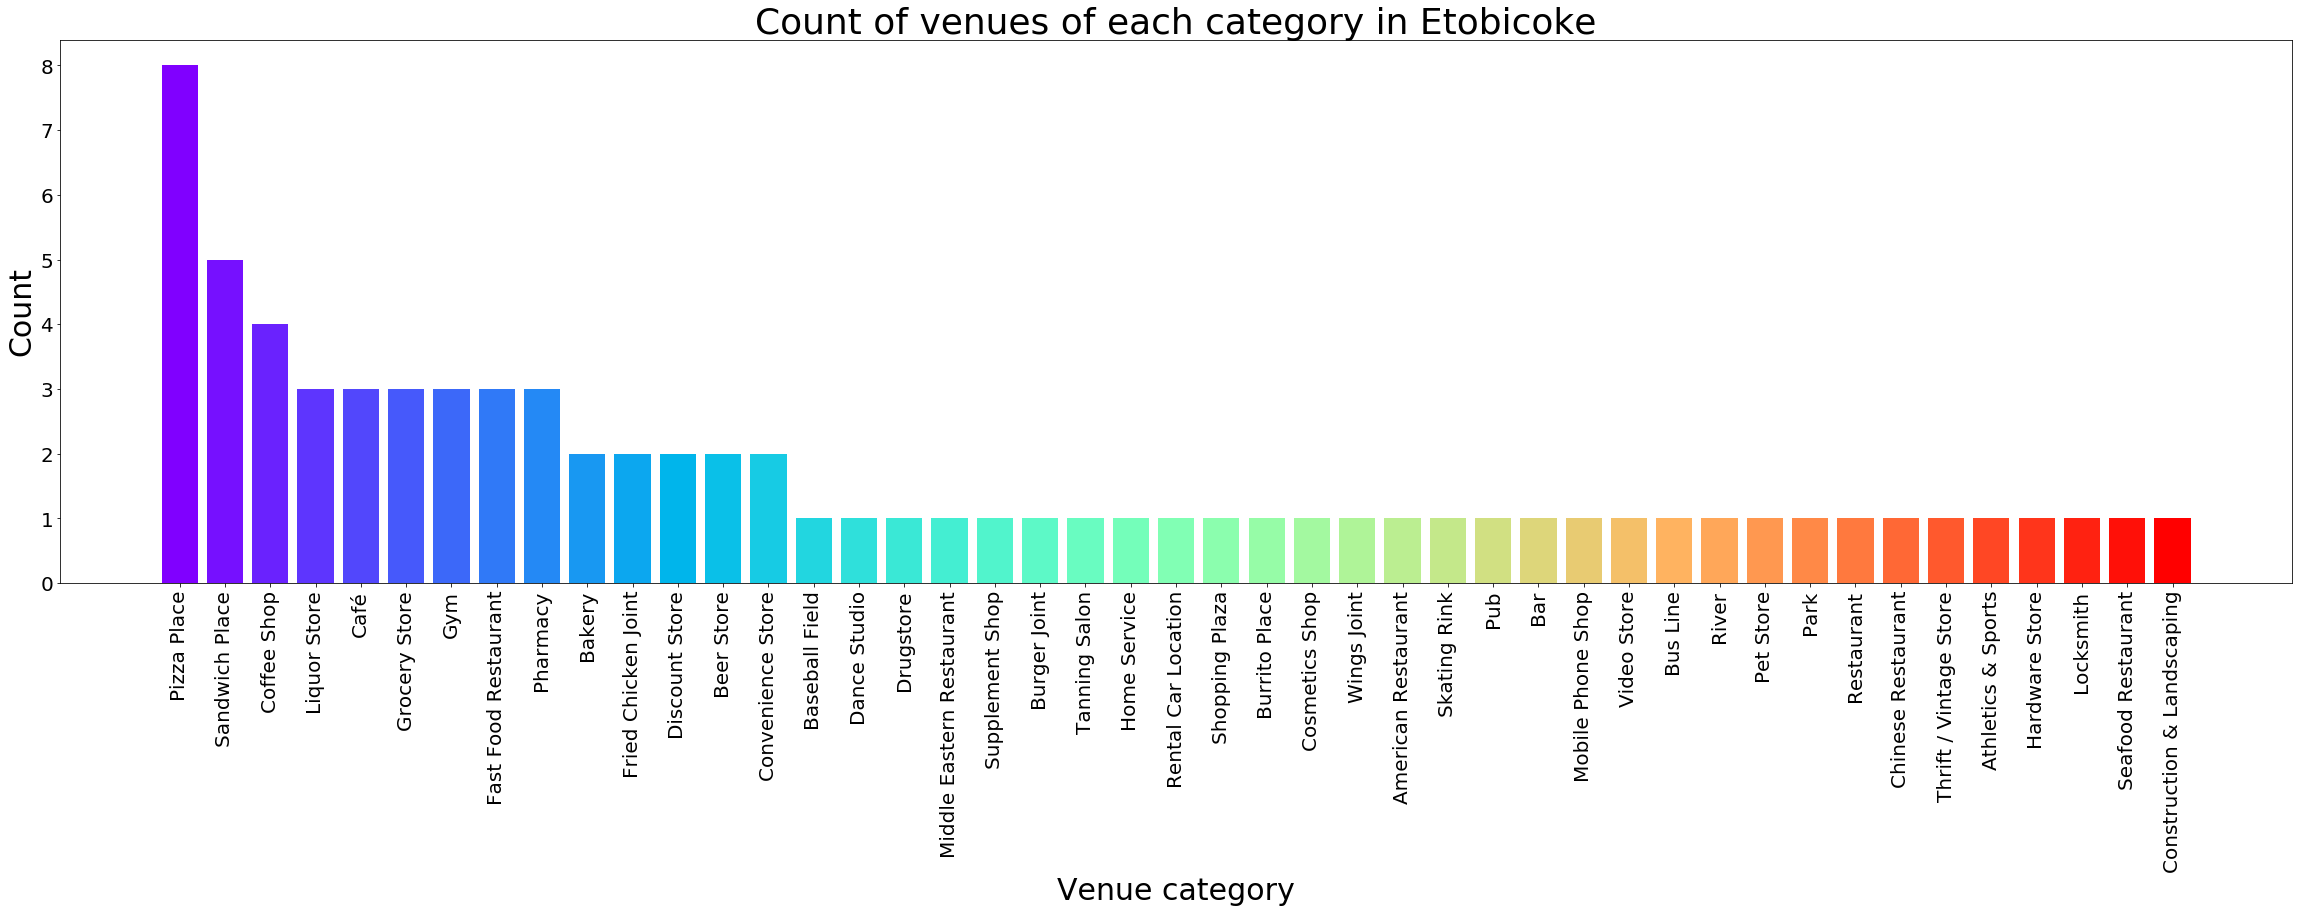

In [62]:
venue_distribution = et_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 10))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Venue category", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.title("Count of venues of each category in Etobicoke", fontsize = 36)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

**Pizza Place is the most common venue in Etobicoke.**

### Bar graph for York

<BarContainer object of 15 artists>

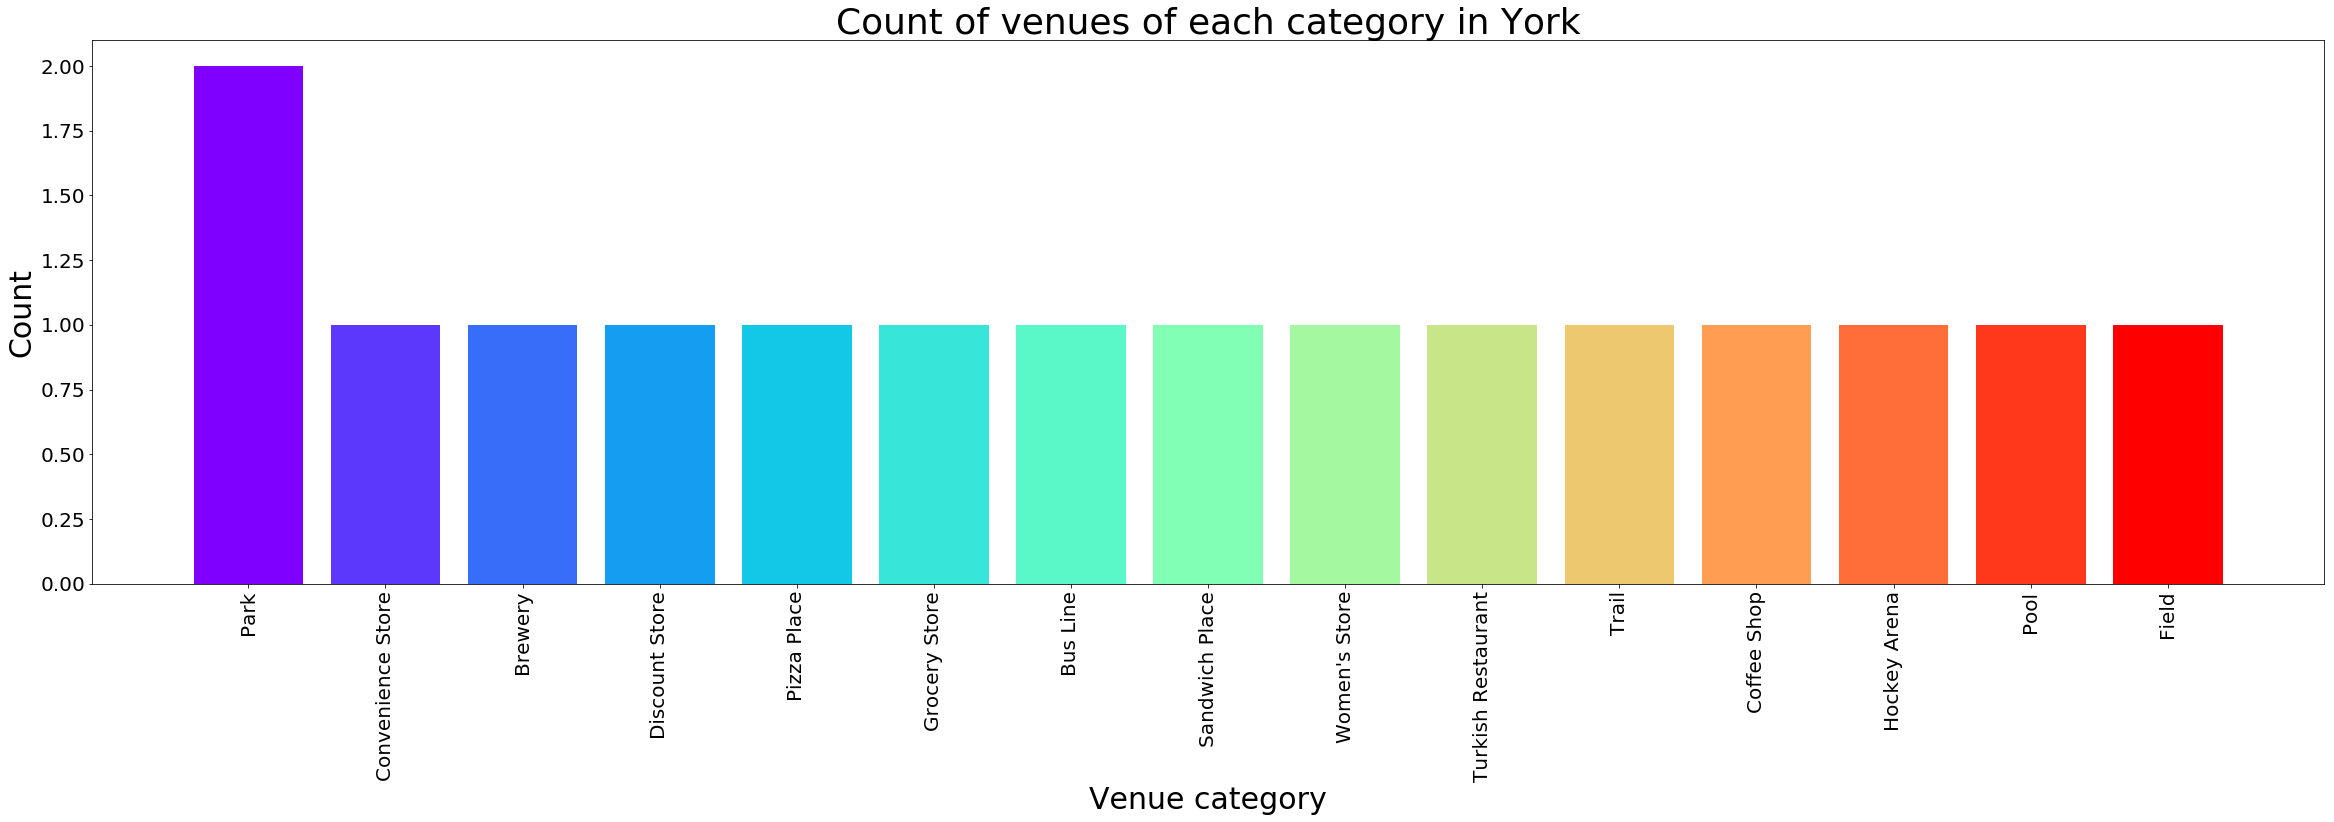

In [63]:
venue_distribution = yk_venues['Venue Category'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (40, 10))
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Venue category", fontsize = 30)
plt.ylabel("Count", fontsize = 30)
plt.title("Count of venues of each category in York", fontsize = 36)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

**Last but not the least, parks are the most common venue at York.**

In [118]:
# add clustering labels
sc_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sc_merged = scarborough

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
sc_merged = sc_merged.join(sc_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sc_merged.head() # check the last columns!

ValueError: Length of values does not match length of index

In [100]:
# add clustering labels
nt_neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

nt_merged = north_york

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
nt_merged = nt_merged.join(nt_neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

nt_merged.head() # check the last columns!

ValueError: Length of values does not match length of index

In [127]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [129]:
Feature = df[['Latitude','Longitude']]
#Feature = pd.concat([Feature,pd.get_dummies(df['Borough'])], axis=1)

Feature.head()

,Latitude,Longitude
0,43.753259,-79.329656
1,43.725882,-79.315572
2,43.654260,-79.360636
3,43.718518,-79.464763
4,43.662301,-79.389494


In [130]:
X = Feature
X[0:5]

,Latitude,Longitude
0,43.753259,-79.329656
1,43.725882,-79.315572
2,43.654260,-79.360636
3,43.718518,-79.464763
4,43.662301,-79.389494


In [131]:
y = df['Borough'].values
y[0:5]

array(['North York', 'North York', 'Downtown Toronto', 'North York',
       'Downtown Toronto'], dtype=object)

In [132]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.93187104,  0.69818881],
       [ 0.40749844,  0.84388426],
       [-0.96437519,  0.37773518],
       [ 0.26644077, -0.6993678 ],
       [-0.81034434,  0.07922652]])

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

In [135]:
from sklearn import metrics

In [136]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.85714286, 0.61904762, 0.66666667, 0.57142857, 0.61904762,
       0.61904762, 0.71428571, 0.66666667, 0.71428571, 0.66666667,
       0.61904762, 0.57142857, 0.57142857, 0.57142857])

In [137]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.8571428571428571


In [141]:
print(yhat[0:10])

['East Toronto' 'Etobicoke' 'Downtown Toronto' 'Downtown Toronto'
 'Downtown Toronto' 'North York' 'North York' 'Scarborough' 'East Toronto'
 'Central Toronto']


In [142]:
print(y_test[0:10])

['East York' 'Etobicoke' 'Downtown Toronto' 'Downtown Toronto'
 'Downtown Toronto' 'North York' 'North York' 'Scarborough' 'East Toronto'
 'Central Toronto']


In [139]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [140]:
yhat = neigh.predict(X_test)
jss_knn = jaccard_similarity_score(y_test , yhat)
f1_knn = f1_score(y_test, yhat, average = 'weighted')
print("Jaccard Similarity Index for K-Nearest Neighbors : ",jss_knn)
print("F1 Score for K-Nearest Neighbors : ",f1_knn)

Jaccard Similarity Index for K-Nearest Neighbors :  0.8571428571428571
F1 Score for K-Nearest Neighbors :  0.8492063492063492
